# Model Selection

3 common models
1. Logistic Regression
2. Random Forest 
3. Support Vector Machine

In [1]:
import pandas as pd 

telco = pd.read_csv('../DATASETS/Churn.csv')

## preprocessing

In [2]:
telco['Intl_Plan'].replace({'no':0, 'yes':1}, inplace=True)
telco['Vmail_Plan'].replace({'no':0, 'yes':1}, inplace=True)

In [3]:
from sklearn.svm import SVC

In [4]:
scv =SVC()

In [5]:
from sklearn.linear_model import LogisticRegression

In [6]:
features = ['Account_Length', 'Vmail_Message', 'Day_Mins', 'Eve_Mins', 'Night_Mins', 'Intl_Mins', 'CustServ_Calls', 'Intl_Plan', 'Vmail_Plan', 'Day_Calls', 'Day_Charge', 'Eve_Calls', 'Eve_Charge',
       'Night_Calls', 'Night_Charge', 'Intl_Calls', 'Intl_Charge']

In [7]:
telco[features]

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Intl_Plan,Vmail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge
0,128,25,265.1,197.4,244.7,10.0,1,0,1,110,45.07,99,16.78,91,11.01,3,2.70
1,107,26,161.6,195.5,254.4,13.7,1,0,1,123,27.47,103,16.62,103,11.45,3,3.70
2,137,0,243.4,121.2,162.6,12.2,0,0,0,114,41.38,110,10.30,104,7.32,5,3.29
3,84,0,299.4,61.9,196.9,6.6,2,1,0,71,50.90,88,5.26,89,8.86,7,1.78
4,75,0,166.7,148.3,186.9,10.1,3,1,0,113,28.34,122,12.61,121,8.41,3,2.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,36,156.2,215.5,279.1,9.9,2,0,1,77,26.55,126,18.32,83,12.56,6,2.67
3329,68,0,231.1,153.4,191.3,9.6,3,0,0,57,39.29,55,13.04,123,8.61,4,2.59
3330,28,0,180.8,288.8,191.9,14.1,2,0,0,109,30.74,58,24.55,91,8.64,6,3.81
3331,184,0,213.8,159.6,139.2,5.0,2,1,0,105,36.35,84,13.57,137,6.26,10,1.35


In [8]:
print(telco.head())

   Account_Length  Vmail_Message  Day_Mins  Eve_Mins  Night_Mins  Intl_Mins  \
0             128             25     265.1     197.4       244.7       10.0   
1             107             26     161.6     195.5       254.4       13.7   
2             137              0     243.4     121.2       162.6       12.2   
3              84              0     299.4      61.9       196.9        6.6   
4              75              0     166.7     148.3       186.9       10.1   

   CustServ_Calls Churn  Intl_Plan  Vmail_Plan  ...  Day_Charge  Eve_Calls  \
0               1    no          0           1  ...       45.07         99   
1               1    no          0           1  ...       27.47        103   
2               0    no          0           0  ...       41.38        110   
3               2    no          1           0  ...       50.90         88   
4               3    no          1           0  ...       28.34        122   

   Eve_Charge  Night_Calls  Night_Charge  Intl_Calls  In

### logistic regression

In [9]:
clf = LogisticRegression()
clf.fit(telco[features], telco['Churn'])

C:\Users\brama\Miniconda3\envs\ds\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### decision tree

In [10]:
from sklearn.tree import DecisionTreeClassifier

In [11]:
clf = DecisionTreeClassifier()
clf.fit(telco[features], telco['Churn'])

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

## Metrics

using sklearn to split data

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
telco_temp = telco[features]

X = telco_temp
# Create target variable
y = telco['Churn']

# Create training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

### random forest

In [14]:
# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Instantiate the classifier
clf = RandomForestClassifier()

# Fit to the training data
clf.fit(X_train, y_train)

# Compute accuracy
print(clf.score(X_train, y_train))

1.0


In [15]:
print(X_train)

      Account_Length  Vmail_Message  Day_Mins  Eve_Mins  Night_Mins  \
3187              58             39     211.9     274.4       210.5   
63               149             28     180.7     187.8       265.5   
1407              73             31      82.3     256.1       229.6   
1393             170              0     246.4     228.1       166.4   
512               62              0     172.8     204.8       240.8   
...              ...            ...       ...       ...         ...   
1185             123              0     211.0     217.0       214.8   
12               168              0     128.8     104.9       141.1   
367               45              0      78.2     253.4       255.0   
1576              94              0     118.7     205.1       172.2   
1357              97              0     169.7     165.9       191.9   

      Intl_Mins  CustServ_Calls  Intl_Plan  Vmail_Plan  Day_Calls  Day_Charge  \
3187        5.4               1          0           1         40 

Precision 
    True Positives / (True Positives + False Positives)
    means that modle has few false positives
    
Recall/Sensitivity
    True Positives / (True Positives + False negatives)
    model correctly classifies most yes

choosing metric relates to what bussines objectives you want to achieve
precision can be used when you want to keep customres
recall on the other hand, should be used when you want to acquire new customer

In [16]:
from sklearn.metrics import confusion_matrix

In [17]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate the classifier
clf = RandomForestClassifier()

# Fit to the training data
clf.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = clf.predict(X_test)

# Import confusion_matrix
from sklearn.metrics import confusion_matrix

# Print confusion matrix
print(confusion_matrix(y_test, y_pred))

[[846   8]
 [ 32 114]]


In [18]:

from sklearn.metrics import precision_score
# Print the precision
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(y_test)

y_test=le.transform(y_test)
y_pred = le.transform(y_pred)

In [19]:
print(precision_score(y_test, y_pred))

0.9344262295081968


In [20]:
print(y_pred)

[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0
 1 0 1 0 0 0 1 0 0 0 0 0 

In [21]:
from sklearn.metrics import recall_score

In [22]:
print(recall_score(y_test, y_pred))

0.7808219178082192


# Other model metrics

ROC curve, a digram explaining which threshold gives best result

In [23]:
y_pred_prob = clf.predict_proba(X_test)[:, 1]

In [24]:

from sklearn.metrics import roc_curve
fpr, tpr, threshold = roc_curve(y_test, y_pred_prob)

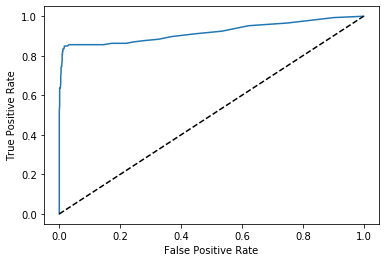

In [25]:
import matplotlib.pyplot as plt
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot([0, 1], [0, 1], "k--")
plt.show()

In [26]:
from sklearn.metrics import roc_auc_score

# Print the AUC
print(roc_auc_score(y_test, y_pred_prob))

0.9200939976259984


F1 Score
2 * (precision * recall) / (precision + recall)

In [27]:

# Import f1_score
from sklearn.metrics import f1_score

# Print the F1 score
print(f1_score(y_test, y_pred))

0.8507462686567165


# Model T